<a href="https://colab.research.google.com/github/Cristian95R/Dataset_Demanda_EnergeticaAR/blob/main/Proyecto_Final_DemandaElectrica_46270.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediccion de la Demanda Eléctrica**

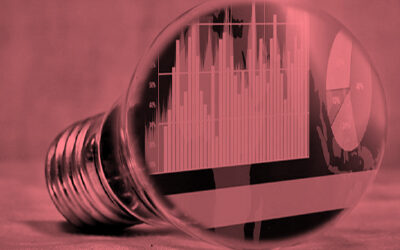

# Índice


1.   *Introducción:
    *   Preguntas Clave y Objetivo
    *   Carga de Datasets y Librerias
2.   Análisis Exploratorio de Datos:
    *   Descripcion de los datos a utilizar
3.   Ingenieria de Caracteristicas:
    *   Analisis de los datsasets individualmente
    *   Analisis de Caracteristicas
    *   Creacion del Dataset Final
4.   Prueba de Modelos:
    *   Eleccion del mejor modelo a utilizar
        *   Regresion Multiple
        *   Random Forest
        *   Gradient Boosting
        *   KNN
    *   Validacion Cruzada a travez de K-Fold
    *   La importancia de las características dentro del modelo
    *   Elemento de la lista

5.   Conclución








# **Introducción**

La demanda de energía es un factor crítico en la formulación de políticas públicas y estrategias empresariales, especialmente para las entidades que gestionan el suministro de electricidad. Comprender y analizar el consumo energético de distintas poblaciones o regiones se vuelve fundamental para asegurar un abastecimiento adecuado y sostenible.

Este estudio se centra en evaluar las demandas energéticas de varios agentes dentro de una geografía determinada, considerando factores como las variaciones temporales, las categorías de consumo, la temperatura y las diferencias regionales.

El objetivo es proporcionar un análisis detallado del comportamiento de la demanda energética, identificando patrones de consumo y prediciendo las necesidades futuras. Esto permitirá a las autoridades y empresas del sector planificar y ejecutar diversas politicas públicas u obras de infraestructura energética que respondan de manera eficiente y efectiva a las necesidades del conjunto de los habitantes, promoviendo así un desarrollo sostenible y una gestión energética óptima.

**Preguntas Clave:**


1.   ¿Cuál es la tendencia de la demanda eléctrica a lo largo del tiempo?
2.   ¿Cómo varía la demanda eléctrica entre diferentes provincias?
3.   ¿Existen diferencias significativas en la demanda eléctrica entre distintas categorías de área o de tarifa?
4.   ¿Cuáles son los meses con mayor y menor demanda eléctrica?
5.   ¿Cómo ha evolucionado la demanda eléctrica a lo largo de los años en una provincia específica?
6.  ¿Hay patrones estacionales en la demanda de energía que se correlacionan con cambios estacionales en el clima?(Análisis estacional de la demanda)
7.   ¿Pueden los datos climáticos mejorar las predicciones de la demanda eléctrica a corto y largo plazo? (Predicción de la demanda)

8.   ¿Cómo varía la influencia del clima en la demanda eléctrica entre diferentes regiones o provincias? (Impacto del clima por región)










In [65]:
#Importacion de Librerias
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import locale
# Configuración para que matplotlib muestre los gráficos en Colab
%matplotlib inline

Se realiza la carga de los datasets que estan alojados en el drive para el analisis que se quiere desarrollar.

Se utilizan los siguientes datasets:
Debido a que no esta funcionando correctamente la api del gobierno argentino se descarga de la pagina de CAMMESA (Compañía Administradora del Mercado Mayorista Eléctrico S.A.) el dataset de Demanda Mensual.xlsx.
De la pagina del Servicio Meteorológico Nacional Argentino se descargo un archivo de texto que posee el registro de temperaturas del país.
Adicionalmente se creó un diccionario de localidades y provincias con el nombre de Provincias_Temp





In [66]:
#Carga de Datasets
from google.colab import drive
drive.mount('/content/drive')
df_Demanda = pd.read_excel("/content/drive/MyDrive/Data Science/Ejercicio Final Coder House/Demanda Mensual.xlsx")

file_path = "/content/drive/MyDrive/Data Science/Ejercicio Final Coder House/Temperatura.txt"
# Leer el archivo como un conjunto de líneas para manejar manualmente las irregularidades
with open(file_path, 'r', encoding='ISO-8859-1') as file:
    lines = file.readlines()

# Saltar las primeras tres líneas y procesar las siguientes
processed_data = []
for line in lines[3:]:
    fecha = line[:8].strip()
    tmax = line[9:14].strip()
    tmin = line[15:20].strip()
    nombre = line[20:].strip()
    processed_data.append([fecha, tmax, tmin, nombre])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Análisis de Exploracion de Datos (EDA)**
En esta seccion se detalla los datasets utilizados en el analisis

**-Demanda Mensual.xlsx**:

El dataset contiene 43,129 registros en 12 columnas.
El archivo no posee nulos en ninguno de sus campos
EL resumen de su estructura es el siguiente:

*   AÑO: Año de la demanda (tipo int64).
*   MES: Contiene la fecha entera de la demanda en formato AAAAMMDD (tipo datetime64).
*   AGENTE NEMO: Identificador/Código del agente (tipo object).
*   AGENTE DESCRIPCION: Descripción del agente (tipo object).
*   TIPO AGENTE: Tipo de agente (GU, probablemente se refiera a 'Gran Usuario' u otro tipo específico) (tipo object).
*   REGION: Región geográfica (tipo object).
*   PROVINCIA: Provincia (tipo object).
*   CATEGORIA AREA: Categoría del área, como 'Gran Usuario MEM' (tipo object).
*   CATEGORIA DEMANDA: Categoría de la demanda, como 'Gran Usuario' (tipo object).
*   TARIFA: Tipo de tarifa aplicada (tipo object).
*   CATEGORIA TARIFA: Categoría de la tarifa, por ejemplo, 'Industrial/Comercial Grande' (tipo object).
*   DEMANDA [MWh]: Demanda eléctrica en MWh (tipo float64).

In [67]:
df_Demanda.head ()

,AÑO,MES,AGENTE NEMO,AGENTE DESCRIPCION,TIPO AGENTE,REGION,PROVINCIA,CATEGORIA AREA,CATEGORIA DEMANDA,TARIFA,CATEGORIA TARIFA,DEMANDA [MWh]
0,2020,2020-01-01,AARGTAOY,AEROP ARG 2000 - Aeroparque,GU,GRAN BS.AS.,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,1699.777
1,2020,2020-01-01,ABRILHCY,ABRIL CLUB DE CAMPO,GU,GRAN BS.AS.,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,1423.579
2,2020,2020-01-01,ACARQQ3Y,ASOC.COOP.ARG. - Quequén,GU,BUENOS AIRES,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,513.050
3,2020,2020-01-01,ACARSLSY,ASOC.COOP.ARG. - San Lorenzo,GU,LITORAL,SANTA FE,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,607.925
4,2020,2020-01-01,ACERBR1Y,ACERBRAG-Bragado,GU,BUENOS AIRES,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,19975.415


**Temp.txt:**
El dataset contiene 46,587 registros en 4 columnas.
EL resumen de su estructura es el siguiente:

*   FECHA: Representa la fecha de la observación. Es de tipo objeto (string) y tiene 46,587 valores no nulos, lo que indica que no hay fechas faltantes en el conjunto de datos. El formato inicial de la fecha es DDMMAAAA
*   TMAX: Corresponde a la temperatura máxima registrada para la fecha y ubicación dadas. Es de tipo flotante y tiene 44,062 valores no nulos, lo que sugiere que hay 1,525 registros sin temperatura máxima.
*   TMIN: Corresponde a la temperatura mínima registrada para la fecha y ubicación dadas. Es de tipo flotante y tiene 45,024 valores no nulos, indicando que hay 1,563 registros sin temperatura mínima.
*   NOMBRE: Indica el nombre de la ubicación donde se realizó la observación. Es de tipo objeto (string) y todos los registros tienen una ubicación asociada. Las ubicaciones corresponden a nombres de locaciones especificas.




In [68]:
with open(file_path, 'r', encoding='ISO-8859-1') as file:
    lines = file.readlines()
    # Saltar las primeras tres líneas y procesar las siguientes
processed_data = []
for line in lines[3:]:
    fecha = line[:8].strip()
    tmax = line[9:14].strip()
    tmin = line[15:20].strip()
    nombre = line[20:].strip()
    processed_data.append([fecha, tmax, tmin, nombre])
# Convertir los datos procesados a un DataFrame de pandas
Temp_df = pd.DataFrame(processed_data, columns=['FECHA', 'TMAX', 'TMIN', 'NOMBRE'])
Temp_df.head()

,FECHA,TMAX,TMIN,NOMBRE
0,31122023,26.0,21.1,AEROPARQUE AERO
1,31122023,26.2,15.3,AZUL AERO
2,31122023,32.3,20.3,BAHIA BLANCA AERO
3,31122023,26.9,11.6,BARILOCHE AERO
4,31122023,4.0,-5.7,BASE BELGRANO II


**Provincias_Temp Diccionario:**
Se crea un diccionario que contiene 121 registros en 2 columnas. Contiene todas los nombres de las localidades del dataset Temp.txt. Relaciona estas localidades con sus respectivas provincias.
El resumen de su estructura es el siguiente:
*   LOCALIDAD: Indica el nombre de la ubicación donde se realizó la observación meteorológica.

*   PROVINCIA: Representa la provincia correspondiente a cada una de las localidades.

In [69]:
Provincias_Temp = {
    "Buenos Aires": ['AEROPARQUE AERO',
 'AZUL AERO',
 'BAHIA BLANCA AERO',
 'BENITO JUAREZ AERO',
 'BOLIVAR AERO',
 'BUENOS AIRES OBSERVATORIO',
 'CAMPO DE MAYO AERO',
 'CORONEL SUAREZ AERO',
 'EL PALOMAR AERO',
 'EZEIZA AERO',
 'ITUZAINGO',
 'JUNIN AERO',
 'LA PLATA AERO',
 'LAS FLORES',
 'MAR DEL PLATA AERO',
 'MARIANO MORENO AERO',
 'MORON AERO',
 'NUEVE DE JULIO',
 'OLAVARRIA AERO',
 'PEHUAJO AERO',
 'PIGUE AERO',
 'PILAR OBSERVATORIO',
 'TANDIL AERO',
 'TRENQUE LAUQUEN',
 'TRES ARROYOS',
 'VILLA DOLORES AERO',
 'VILLA GESELL AERO',
 'PUNTA INDIO B.A.',
 'CORONEL PRINGLES AERO',
 'DOLORES AERO'],

    "Rio Negro": [
        'BARILOCHE AERO',
 'CIPOLLETTI',
 'EL BOLSON AERO',
 'MAQUINCHAO',
 'SAN ANTONIO OESTE AERO',
 'VIEDMA AERO'],

    "Antartida":
    ['BASE BELGRANO II',
 'BASE CARLINI (EX JUBANY)',
 'BASE ESPERANZA',
 'BASE MARAMBIO',
 'BASE ORCADAS',
 'BASE SAN MARTIN'],

  "Jujuy":['JUJUY AERO', 'JUJUY U N', 'LA QUIACA OBSERVATORIO'],

  "Salta": ['METAN', 'ORAN AERO', 'SALTA AERO', 'SAN JULIAN AERO', 'TARTAGAL AERO'],

  "Catamarca":['CATAMARCA AERO', 'TINOGASTA'],

  "Tucuman": ['TUCUMAN AERO'],

  "Santiago del Estero": ['RIVADAVIA', 'SANTIAGO DEL ESTERO AERO', 'TERMAS DE RIO HONDO AERO'],

  "Chaco": ['PRESIDENCIA ROQUE SAENZ PEÑA AERO', 'RESISTENCIA AERO'],

  "Formosa": ['FORMOSA AERO', 'LAS LOMITAS'],

  "Cordoba": ['CORDOBA AERO',
 'CORDOBA OBSERVATORIO',
 'LABOULAYE AERO',
 'MARCOS JUAREZ AERO',
 'RIO CUARTO AERO',
 'VILLA DE MARIA DEL RIO SECO',
 'ESCUELA DE AVIACION MILITAR AERO'],

  "La Rioja": ['CHEPES', 'CHILECITO AERO', 'LA RIOJA AERO', 'CHAMICAL AERO'],

  "San Juan": ['JACHAL', 'SAN JUAN AERO'],

  "San Luis": ['MERLO AERO',
 'SAN LUIS AERO',
 'VILLA REYNOLDS AERO',
 'SANTA ROSA DE CONLARA AERO'],

  "Mendoza": ['MALARGUE AERO',
 'MENDOZA AERO',
 'MENDOZA OBSERVATORIO',
 'SAN MARTIN (MZA)',
 'USPALLATA'],

  "Chubut": ['COMODORO RIVADAVIA AERO', 'ESQUEL AERO', 'PASO DE INDIOS', 'TRELEW AERO'],

  "Santa Cruz": ['EL CALAFATE AERO',
 'GOBERNADOR GREGORES AERO',
 'PUERTO DESEADO AERO',
 'PUERTO MADRYN AERO',
 'RIO GALLEGOS AERO',
 'SANTA CRUZ AERO',
 'PERITO MORENO AERO'],

  "Tierra del Fuego": ['RIO GRANDE B.A.', 'USHUAIA AERO'],

  "Santa Fe": ['CERES AERO',
 'RAFAELA AERO',
 'RECONQUISTA AERO',
 'ROSARIO AERO',
 'SAN RAFAEL AERO',
 'SAUCE VIEJO AERO',
 'SUNCHALES AERO',
 'VENADO TUERTO AERO'],

  "Entre Rios":  ['CONCORDIA AERO', 'GUALEGUAYCHU AERO', 'PARANA AERO'],

  "La Pampa": ['GENERAL PICO AERO', 'SANTA ROSA AERO', 'VICTORICA'],

  "Corrientes": ['CORRIENTES AERO',
 'MERCEDES AERO (CTES)',
 'MONTE CASEROS AERO',
 'PASO DE LOS LIBRES AERO',
 'OBERA'],

  "Misiones": ['BERNARDO DE IRIGOYEN AERO', 'IGUAZU AERO', 'POSADAS AERO'],
}

Creo un dataset a partir del diccionario

In [70]:
# Convertir el diccionario en una lista de tuplas (provincia, localidad)
datos_flatten = [(provincia, localidad) for provincia, localidades in Provincias_Temp.items() for localidad in localidades]

# Crear un DataFrame a partir de la lista de tuplas
DF_prov_temp = pd.DataFrame(datos_flatten, columns=['PROVINCIA', 'LOCALIDAD'])

# **Feature Engineer o Ingenieria de Caracteristicas**

Usando el conocimiento del objetivo que se busca alcanzar en esta parte se procedera a seleccionar, modificar o crear nuevas características (variables) a partir de los datos crudos, con el fin de hacer los modelos de machine learning más eficaces. Este proceso es crucial porque la calidad y relevancia de las características utilizadas pueden tener un impacto significativo en la capacidad del modelo para aprender y realizar predicciones o clasificaciones.

Los Pasos que se realizaran son los siguientes:



*  *Seleccion de Caracteristicas:* Se identificaran las variables que necesito para el modelo y se eliminaran las variables que no aporten informacion relevante.
* *Transformación de características:* Se aplicaran sobre algunas variables transformaciones para mejorar la relacion o distribucion con la variable a analizar(Variable Target)
*   *Creación de características:* Desarrolla nuevas variables a partir de las existentes combinandolas o modificandolas para mejorar el analisis.
*   *Manejo de valores faltantes*





Con el Dataset de **Demanda Mensual.xlsx(DM)** se procede a realizar una Seleccion de Caracteristicas. Las variables no necesarias para el modelo son Agente Nemo, Tipo Agente y Categoria Demanda; Todas ellas pertenecen a nomenclaturas internas propias de la empresa que genera el dataset, por lo que no aportan ningún valor a nuestro analisis.

Tambien se realiza una Creacion de Caracteristicas a la variable MES la misma tiene dentro de si el año, el mes y el dia expresado de la siguiente forma AAAA-MM-DD por lo que se procede a que en la columna mes solo quede el numero del mes correspondiente. Ademas se crean dos nuevas columnas una para el número del dia y otra para el nombre del dia.

Una vez arreglado el dataset se procedera a realizar mediciones individuales para evaluar las tendencias del mismo


In [71]:
# Cambiar la columna 'MES' para que contenga solo el número del mes
df_Demanda['NUMERO_MES'] = df_Demanda['MES'].dt.month  # Crear una nueva columna para el número del mes para evitar confusión

# Renombrar la columna 'MES' a 'FECHA' para evitar confusiones y usar 'NUMERO_MES' como la columna del mes
df_Demanda.rename(columns={'MES': 'FECHA'}, inplace=True)
df_Demanda.rename(columns={'NUMERO_MES': 'MES'}, inplace=True)

# Eliminar la columna 'FECHA' y 'AGENTE NEMO'
df_Demanda = df_Demanda.drop(columns=['FECHA', 'AGENTE NEMO', 'TIPO AGENTE', 'CATEGORIA DEMANDA'])

# Reordenar las columnas para que 'AÑO', 'MES' y 'DIA' estén juntos al principio
column_order = ['AÑO', 'MES'] + [col for col in df_Demanda.columns if col not in ['AÑO', 'MES']]
df_Demanda = df_Demanda[column_order]

# Verificar el resultado final
df_Demanda.head()

,AÑO,MES,AGENTE DESCRIPCION,REGION,PROVINCIA,CATEGORIA AREA,TARIFA,CATEGORIA TARIFA,DEMANDA [MWh]
0,2020,1,AEROP ARG 2000 - Aeroparque,GRAN BS.AS.,BUENOS AIRES,Gran Usuario MEM,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,1699.777
1,2020,1,ABRIL CLUB DE CAMPO,GRAN BS.AS.,BUENOS AIRES,Gran Usuario MEM,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,1423.579
2,2020,1,ASOC.COOP.ARG. - Quequén,BUENOS AIRES,BUENOS AIRES,Gran Usuario MEM,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,513.050
3,2020,1,ASOC.COOP.ARG. - San Lorenzo,LITORAL,SANTA FE,Gran Usuario MEM,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,607.925
4,2020,1,ACERBRAG-Bragado,BUENOS AIRES,BUENOS AIRES,Gran Usuario MEM,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,19975.415


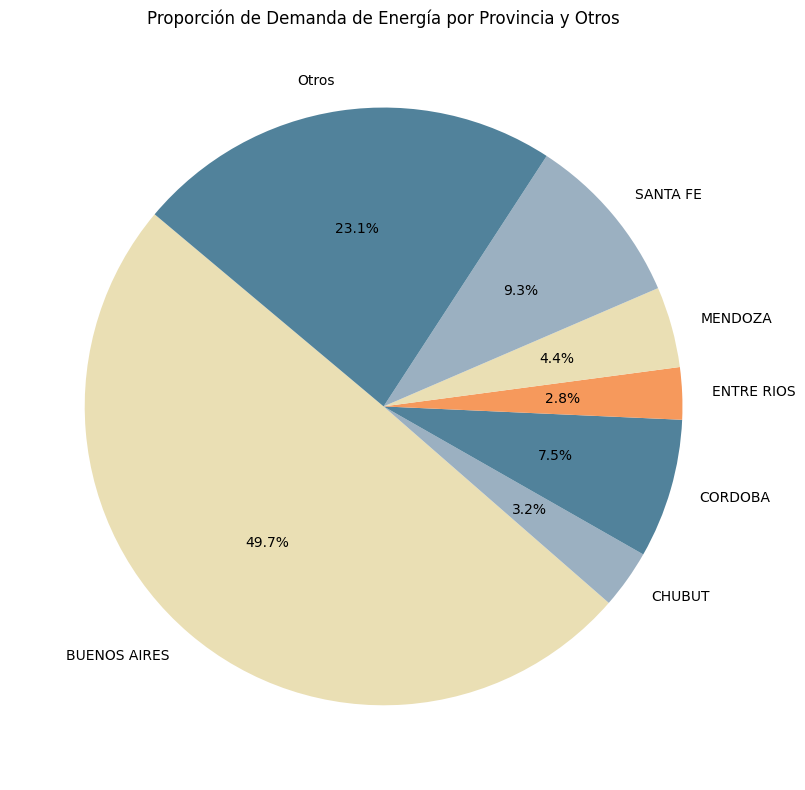

In [72]:
# Calcular la demanda total de energía por provincia nuevamente
demanda_total_por_provincia = df_Demanda.groupby('PROVINCIA')['DEMANDA [MWh]'].sum()

# Calcular el total de demanda de energía para determinar el porcentaje
total_demanda = demanda_total_por_provincia.sum()

# Encontrar provincias con menos del 3% de la demanda total y agruparlas en la categoría "Otros"
otros = demanda_total_por_provincia[demanda_total_por_provincia / total_demanda < 0.025].sum()
demanda_agrupada = demanda_total_por_provincia[demanda_total_por_provincia / total_demanda >= 0.025]
demanda_agrupada['Otros'] = otros

# Definir la gama de colores para el gráfico
colores = ['#EADFB4', '#9BB0C1', '#51829B', '#F6995C']

# Crear el gráfico de torta con la gama de colores especificada
plt.figure(figsize=(10, 8))
plt.pie(demanda_agrupada, labels=demanda_agrupada.index, autopct='%1.1f%%', startangle=140, colors=colores)
plt.title('Proporción de Demanda de Energía por Provincia y Otros')
plt.tight_layout()
plt.show()

<ipython-input-73-f168e139bca7>:28: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=demanda_por_mes_y_region, x='AÑO_MES', y='DEMANDA [MWh]', hue='REGION2', palette=colores_regiones, marker="o")


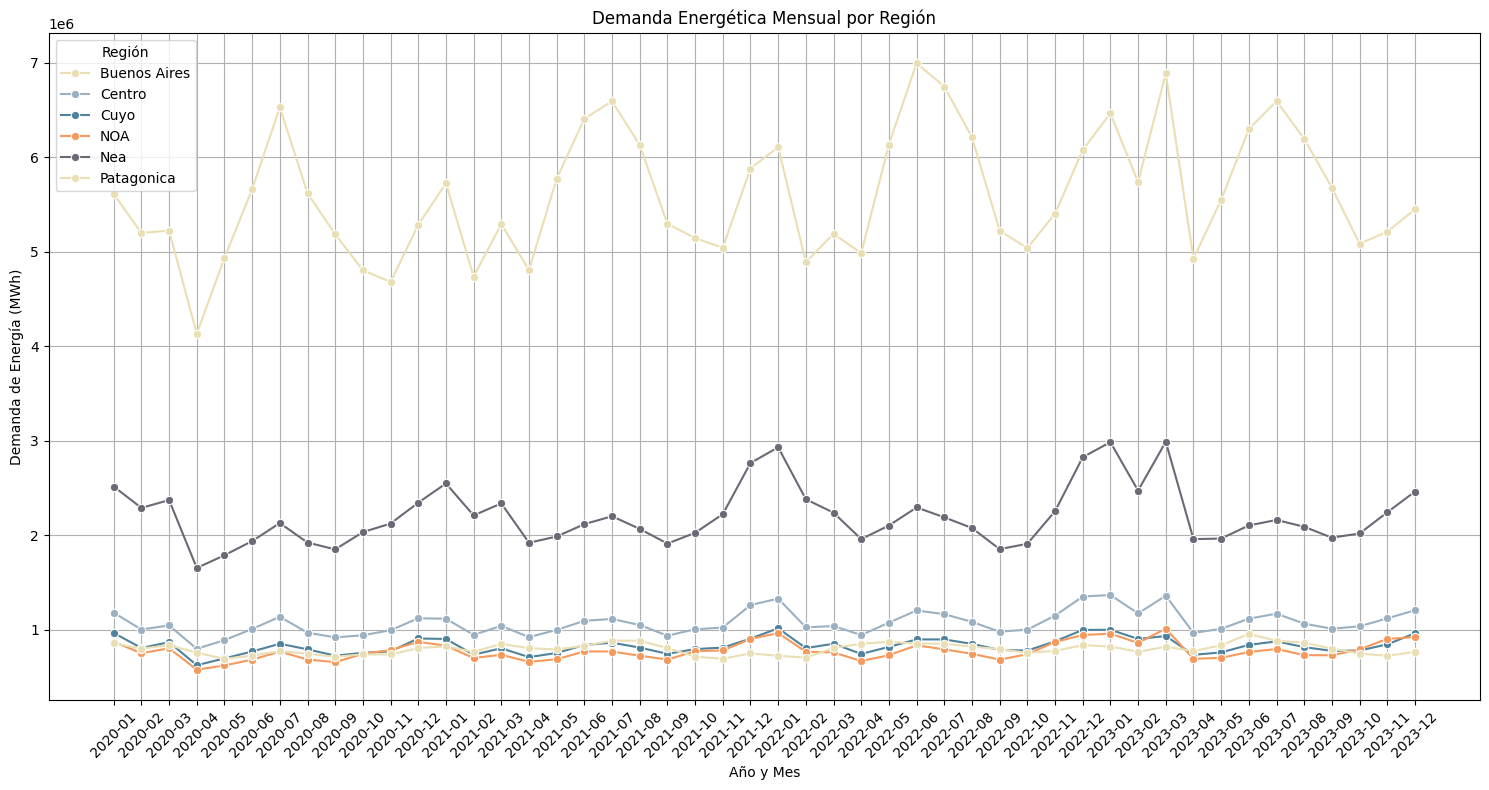

In [73]:
# Mapeo de provincias a regiones para ver la tendencias de las regiones
regiones = {
    'Nea': ['CHACO', 'MISIONES', 'CORRIENTES', 'ENTRE RIOS', 'FORMOSA', 'SANTA FE'],
    'Centro': ['LA PAMPA', 'CORDOBA', 'SGO.DEL ESTERO'],
    'Cuyo': ['MENDOZA', 'SAN LUIS', 'SAN JUAN'],
    'NOA': ['SALTA', 'JUJUY', 'TUCUMAN', 'CATAMARCA', 'LA RIOJA'],
    'Patagonica': ['NEUQUEN', 'RIO NEGRO', 'CHUBUT', 'SANTA CRUZ'],
    'Buenos Aires': ['BUENOS AIRES']
}

# Crear un diccionario inverso para mapear cada provincia a su región
provincia_region = {provincia: region for region, provincias in regiones.items() for provincia in provincias}

# Asignar la región a cada fila en el DataFrame
df_Demanda['REGION2'] = df_Demanda['PROVINCIA'].map(provincia_region)

# Combinar las columnas de 'AÑO' y 'MES' en una sola para el agrupamiento
df_Demanda['AÑO_MES'] = df_Demanda['AÑO'].astype(str) + '-' + df_Demanda['MES'].astype(str).str.zfill(2)

# Agrupar los datos por 'AÑO_MES' y 'REGION' para sumar la demanda de energía
demanda_por_mes_y_region = df_Demanda.groupby(['AÑO_MES', 'REGION2'])['DEMANDA [MWh]'].sum().reset_index()

# Definir la paleta de colores
colores_regiones = ['#EADFB4', '#9BB0C1', '#51829B', '#F6995C', '#6D6875']

# Crear el gráfico de líneas
plt.figure(figsize=(15, 8))
sns.lineplot(data=demanda_por_mes_y_region, x='AÑO_MES', y='DEMANDA [MWh]', hue='REGION2', palette=colores_regiones, marker="o")

plt.xticks(rotation=45)
plt.title('Demanda Energética Mensual por Región')
plt.xlabel('Año y Mes')
plt.ylabel('Demanda de Energía (MWh)')
plt.legend(title='Región')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-74-18d8f6d6c90e>:9: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=demanda_promedio_por_mes_y_region, x='MES', y='DEMANDA [MWh]', hue='REGION2',palette=colores_regiones , marker="o")


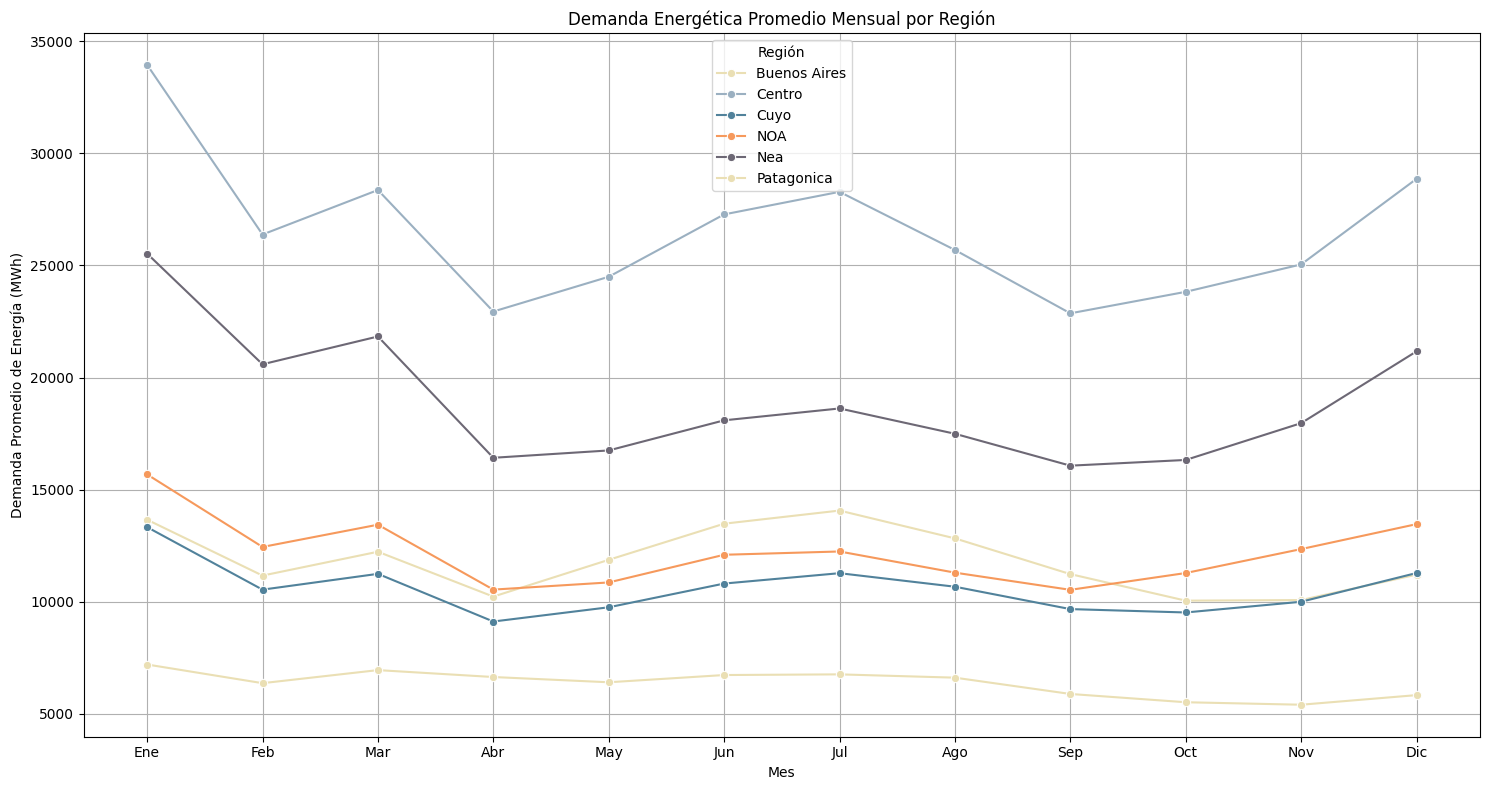

In [74]:
# Extraer el mes de la columna 'AÑO_MES' para el análisis mensual
df_Demanda['MES'] = pd.to_datetime(df_Demanda['AÑO_MES']).dt.month

# Agrupar los datos por región y mes para obtener la demanda promedio de energía
demanda_promedio_por_mes_y_region = df_Demanda.groupby(['REGION2', 'MES'])['DEMANDA [MWh]'].mean().reset_index()

# Crear el gráfico de líneas para cada región, mostrando la demanda promedio de energía por mes
plt.figure(figsize=(15, 8))
sns.lineplot(data=demanda_promedio_por_mes_y_region, x='MES', y='DEMANDA [MWh]', hue='REGION2',palette=colores_regiones , marker="o")

plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.title('Demanda Energética Promedio Mensual por Región')
plt.xlabel('Mes')
plt.ylabel('Demanda Promedio de Energía (MWh)')
plt.legend(title='Región')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-75-92bf30675426>:7: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=demanda_por_año_y_region, x='AÑO', y='DEMANDA [MWh]', hue='REGION2',palette=colores_regiones, marker="o")


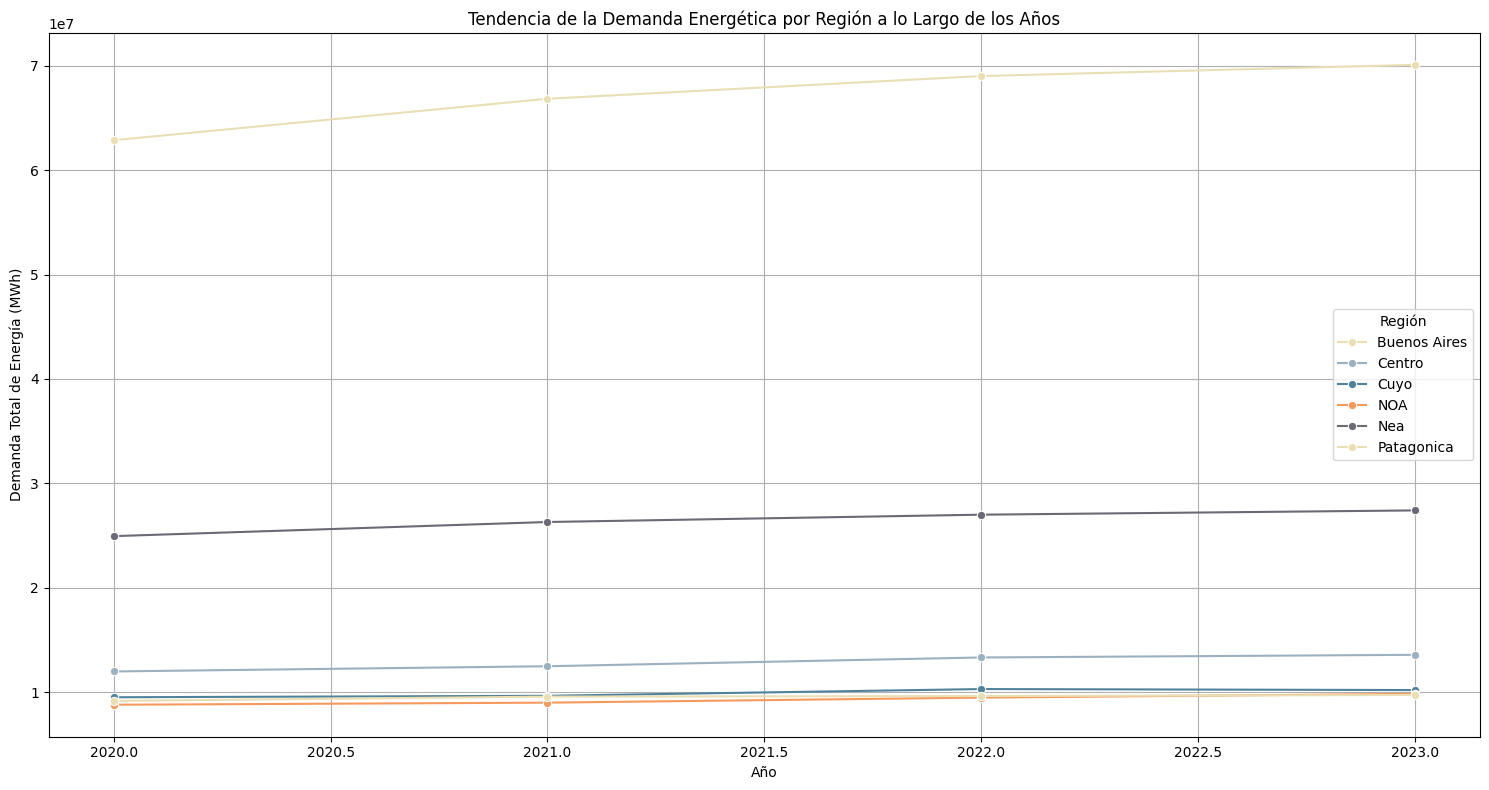

In [75]:
# Asumiendo que 'df' ya está cargado y contiene tus datos
# Agrupar los datos por año y región para obtener la demanda total o promedio de energía
demanda_por_año_y_region = df_Demanda.groupby(['REGION2', 'AÑO'])['DEMANDA [MWh]'].sum().reset_index()

# Crear el gráfico de líneas para mostrar la tendencia de la demanda de energía por año en cada región
plt.figure(figsize=(15, 8))
sns.lineplot(data=demanda_por_año_y_region, x='AÑO', y='DEMANDA [MWh]', hue='REGION2',palette=colores_regiones, marker="o")

plt.title('Tendencia de la Demanda Energética por Región a lo Largo de los Años')
plt.xlabel('Año')
plt.ylabel('Demanda Total de Energía (MWh)')
plt.legend(title='Región')
plt.grid(True)
plt.tight_layout()
plt.show()

Es Buenos Aires quien demanda mayor cantidad de energía, representa casi el 50% de la demanda total mientras que un 23,1% representa a mas de 10 provincias(donde cada una de ellas demanda menos del 2,5% del total). Quien le sigue a Buenos Aires es Santa Fe con una demanda del 9,3% y tercero se ubica Córdoba con 7,5%

La región Patagónica posee una demanda de energía lineal que no sigue la tendencia de las demás regiones.

Se observa que existe una tendencia de mayor demanda en algunos meses donde se producen los picos. Son el Centro y el NEA quienes tienen mayor mayores diferencias entre los meses de mayor demanda.
Buenos Aires , el NEA  y el Centro son quienes muestran un alza en su demanda a lo largo del tiempo


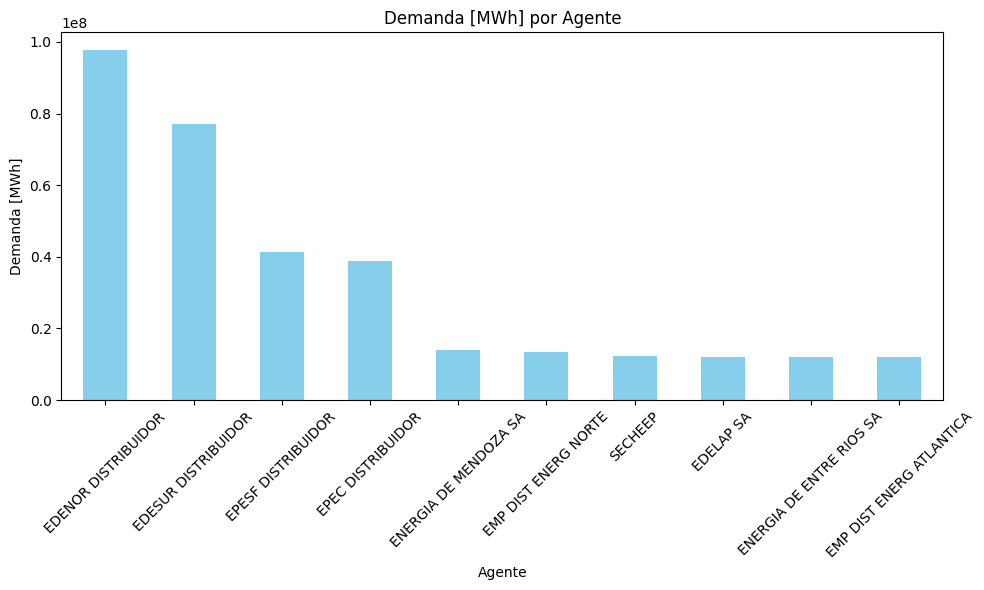

In [76]:
# Agrupando los datos por AGENTE_DESCRIPCION y sumando la demanda
demand_by_agent = df_Demanda.groupby('AGENTE DESCRIPCION')['DEMANDA [MWh]'].sum().sort_values(ascending=False)

# Seleccionando los 10 agentes con mayor demanda para un gráfico más claro
top_agents = demand_by_agent.head(10)

# Creando el gráfico de barras
plt.figure(figsize=(10, 6))
top_agents.plot(kind='bar', color='skyblue')
plt.title('Demanda [MWh] por Agente')
plt.xlabel('Agente')
plt.ylabel('Demanda [MWh]')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrando el gráfico
plt.show()

En el anterior grafico se ve que las empresas distribuidores de energia de Buenos Aires son quienes mas demandan energia

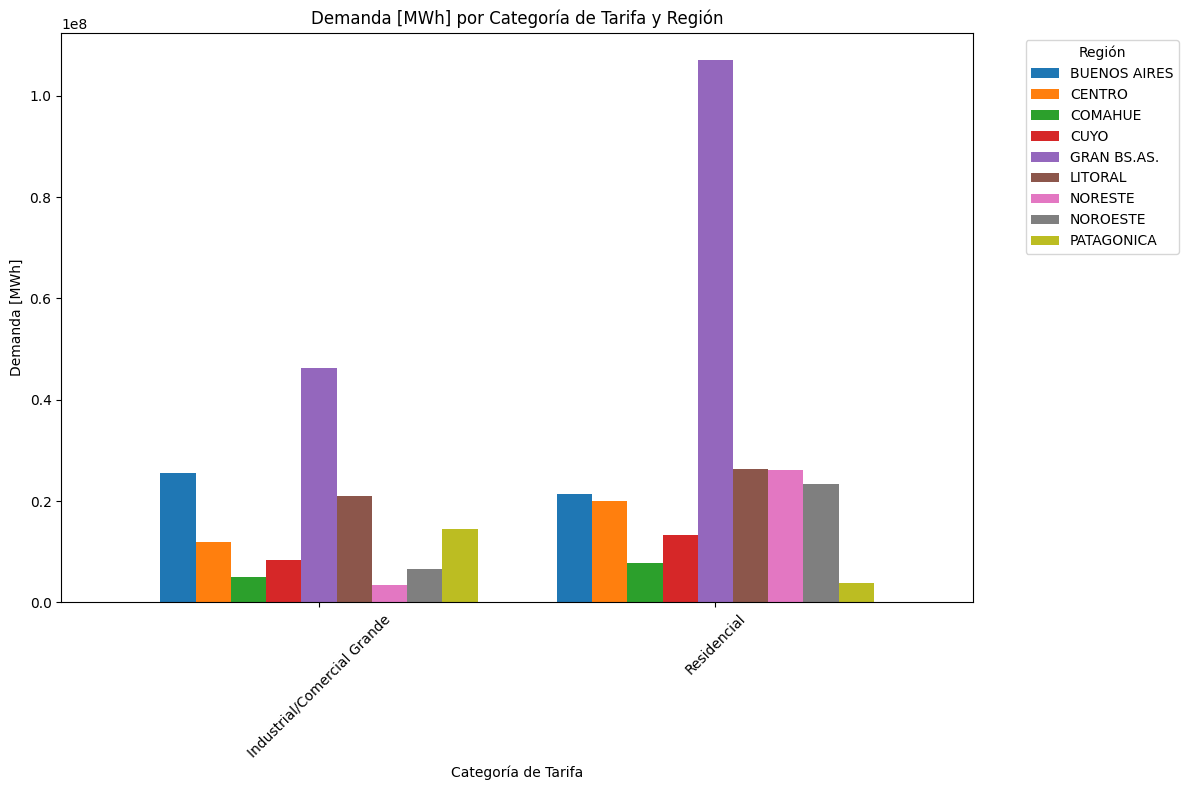

In [77]:
# Filtrando los datos para incluir solo las categorías de interés: Industrial, Comercial, Residencial
filtered_data = df_Demanda[df_Demanda['CATEGORIA TARIFA'].isin(['Industrial/Comercial Grande', 'Residencial'])]

# Agrupando los datos por CATEGORIA_TARIFA, REGION y sumando la demanda
demand_by_category_region = filtered_data.groupby(['CATEGORIA TARIFA', 'REGION'])['DEMANDA [MWh]'].sum().unstack()

# Creando el gráfico de barras agrupadas
ax = demand_by_category_region.plot(kind='bar', figsize=(12, 8), width=0.8)
plt.title('Demanda [MWh] por Categoría de Tarifa y Región')
plt.xlabel('Categoría de Tarifa')
plt.ylabel('Demanda [MWh]')
plt.xticks(rotation=45)
plt.legend(title='Región', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrando el gráfico
plt.tight_layout()
plt.show()

Se puede ver como la region del Gran Buenos Aires que abarca la capital y sus municipios aledaños son quienes demandan la mayor cantidad de energia. Esto puede acompañar al analisis de los otros graficos y asi entender mejor porque es Buenos Aires quien demanda mayor cantidad de energia

Con el dataset del **clima(Temp.txt)** lo que se va a realizar es una transformacion de caracteristicas a todas sus variables. La variable fecha va a separarse en tres columnas(Año, Mes, Dia) mientras que las variables Tmax y Tmin que corresponden a las temperaturas maximas y minimas de las ubicaciones se creara un promedio entre ellas si la localidad se encuentra en la misma provincia con el fin de dejar para un dia del mes del año una temperatura maxcima y otra minima para cada una de las provincias. Y con la columna final Nombre se eliminara y se creara una nueva columna llamada Provincia. Esto se va a realizar con ayuda del diccionario **Provincias_Temp** que es el que provee de la informacion que relaciona a cada ubicacion con su provincia correspondiente.

Las lineas que encuentren nulos en sus columnas seran eliminadas y no seran parte del analisis.

Una vez arreglado el dataset se procedera a realizar mediciones individuales para evaluar las tendencias del mismo

In [78]:
# Convertir los datos procesados a un DataFrame de pandas
Temp_df = pd.DataFrame(processed_data, columns=['FECHA', 'TMAX', 'TMIN', 'NOMBRE'])

# Convertir las columnas TMAX y TMIN a numéricas, manejando valores no numéricos
Temp_df['TMAX'] = pd.to_numeric(Temp_df['TMAX'], errors='coerce')
Temp_df['TMIN'] = pd.to_numeric(Temp_df['TMIN'], errors='coerce')

#Modificacion del formato Fecha del dataframe de Temperatura
# Corregir las fechas inválidas añadiendo el cero faltante para los meses
Temp_df['FECHA'] = Temp_df['FECHA'].apply(lambda x: f"0{x}" if len(str(x)) == 7 else str(x))

# Intentar convertir nuevamente a formato de fecha
try:
    Temp_df['FECHA'] = pd.to_datetime(Temp_df['FECHA'], format='%d%m%Y')
except ValueError as e:
    print(f"Error al convertir: {e}")

#Creo un nuevo dataframe donde agrupo las localidades correspondientes a cada una de las provincias y creo una medida general para cada una de ellas
# Realizar nuevamente la fusión con el dataframe corregido
merged_df = Temp_df.merge(DF_prov_temp, left_on='NOMBRE', right_on='LOCALIDAD')

# Agrupar por fecha y provincia, calculando las temperaturas máximas y mínimas para cada grupo
TempProv_df = merged_df.groupby(['FECHA', 'PROVINCIA']).agg(TMAX_PROV=('TMAX', 'max'), TMIN_PROV=('TMIN', 'min')).reset_index()

# Extraer el año, el mes y el día en columnas separadas
TempProv_df['AÑO'] = TempProv_df['FECHA'].dt.year
TempProv_df['MES'] = TempProv_df['FECHA'].dt.month

# Eliminar la columna 'FECHA'
DF_TEMP = TempProv_df.drop('FECHA', axis=1)

# Reordenar las columnas según lo especificado
columnas_ordenadas = ['AÑO', 'MES', 'TMAX_PROV', 'TMIN_PROV', 'PROVINCIA']
DF_TEMP= DF_TEMP[columnas_ordenadas]
# Renombrar las columnas 'TMAX_PROV' y 'TMIN_PROV' a 'TMAX' y 'TMIN', respectivamente
DF_TEMP.rename(columns={'TMAX_PROV': 'TMAX', 'TMIN_PROV': 'TMIN'}, inplace=True)

# Agrupando por 'AÑO' y 'MES' y calculando el promedio de 'TMAX' y 'TMIN'
monthly_avg_temp = DF_TEMP.groupby(['AÑO', 'MES', 'PROVINCIA']).agg(
    TMAX=pd.NamedAgg(column='TMAX', aggfunc='mean'),
    TMIN=pd.NamedAgg(column='TMIN', aggfunc='mean')
).reset_index()


# Mostrar las primeras filas del dataframe resultante para confirmar
DF_TEMP.head()

,AÑO,MES,TMAX,TMIN,PROVINCIA
0,2022,12,4.9,-8.5,Antartida
1,2022,12,40.8,11.7,Buenos Aires
2,2022,12,41.8,21.0,Catamarca
3,2022,12,40.4,22.5,Chaco
4,2022,12,30.0,8.2,Chubut



**Dataset Final de Temperaturas**
Este dataset es creado a partir del archivo Temp.txt y del diccionario Provincias_Temp el mismo contiene 9361 registros y la siguiente estructura:


*   FECHA: Representa la fecha de la observación. Es de tipo objeto (string).
*   TMAX: Corresponde a la temperatura máxima registrada para la fecha y representa una temperatura máxima media para cada provincia.
*  TMIN: Corresponde a la temperatura mínima registrada para la fecha y representa una temperatura mínima media para cada provincia.
* PROVINCIA: Representa la provincia correspondiente a cada una de las localidades. Es de tipo objeto (string) y todos los registros tienen una provincia asociada.

El fin de este dataset es poder complementar el análisis del dataset de demanda eléctrica con la información de la temperatura registrada por día y por provincia
Una característica de este dataset es que por cuestiones de donde se descarga la información posee solo registros que comprenden entre el 7 de diciembre de 2022 hasta el 31 de diciembre de 2023.

Al no tener en el dataset principal el dia, se procede a crear un promedio mensual de la temperatura maxima y minima asi poder luego unir ambos datasets.







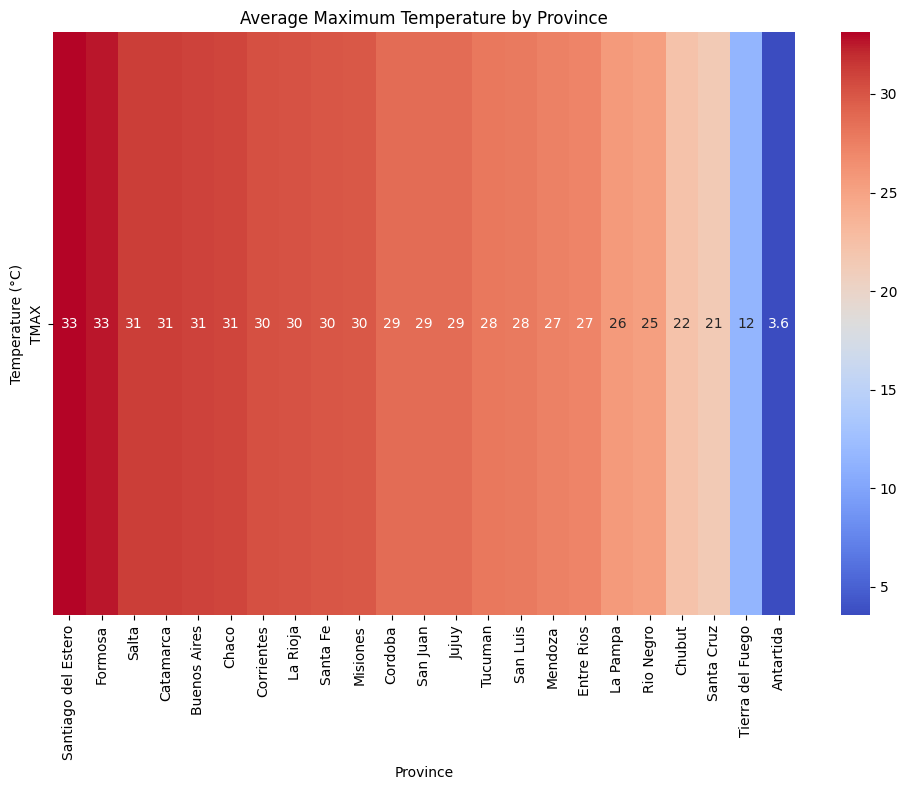

In [79]:
# Preparing the data: aggregating the maximum temperature by province
heatmap_data = DF_TEMP.groupby('PROVINCIA')['TMAX'].mean().reset_index()

# Sorting the data to have a consistent order in the heatmap
heatmap_data = heatmap_data.sort_values(by='TMAX', ascending=False)

# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data.set_index('PROVINCIA').T, cmap='coolwarm', annot=True)
plt.title('Average Maximum Temperature by Province')
plt.xlabel('Province')
plt.ylabel('Temperature (°C)')
plt.tight_layout()  # Adjusts plot to fit the labels
plt.show()

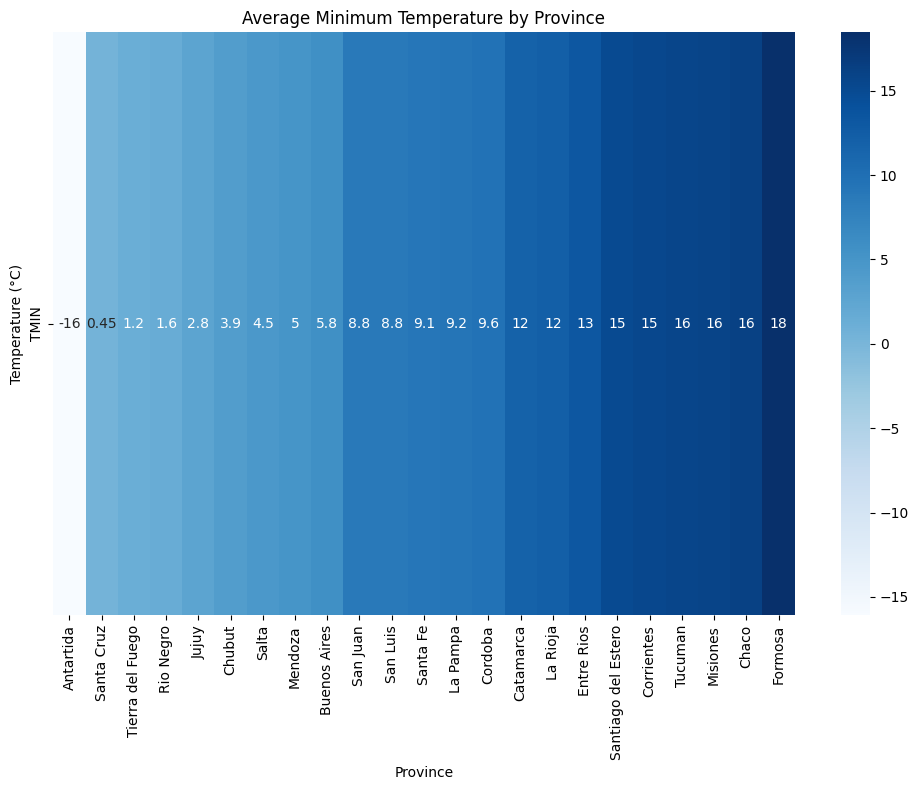

In [80]:
# Preparing the data: aggregating the minimum temperature by province
heatmap_data_min = DF_TEMP.groupby('PROVINCIA')['TMIN'].mean().sort_values().reset_index()

# Creating the heatmap for minimum temperatures using a blue color palette
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data_min.set_index('PROVINCIA').T, cmap='Blues', annot=True)
plt.title('Average Minimum Temperature by Province')
plt.xlabel('Province')
plt.ylabel('Temperature (°C)')
plt.tight_layout()  # Adjusts plot to fit the labels
plt.show()

Se puede ver que la provincia que posee los valores mas altos de temperatura es Formosa mientras que la provincia que registra los valores mas frios es Santa Cruz descartando los valores de la Antartida

Para pasar al proximo paso voy a unir estos dos datasets para crear uno solo llamado DF_Final. Este dataset tendrá los datos desde Diciembre de 2022 hasta Diciembre de 2023. En este dataset se combinan los datos de demanda de energia con los de temperatura de cada provincia.  

In [81]:
# Estandarizar los nombres de las provincias para que coincidan entre los datasets
DF_TEMP['PROVINCIA'] = DF_TEMP['PROVINCIA'].str.upper()
DF_TEMP = DF_TEMP [~DF_TEMP ['PROVINCIA'].isin(['Tierra del fuego', 'Antartida'])]
# Identifica la fila donde la columna 'provincia' es 'SANTIAGO DEL ESTERO' y cambia ese valor a 'SGO.DEL ESTERO'
DF_TEMP.loc[DF_TEMP['PROVINCIA'] == 'SANTIAGO DEL ESTERO', 'PROVINCIA'] = 'SGO.DEL ESTERO'

In [82]:
# Realizar el inner join
DF_Final = pd.merge(df_Demanda, DF_TEMP, on=['AÑO', 'MES', 'PROVINCIA'], how='inner')

# Eliminar duplicados basándose en las columnas Año, Mes, Provincia y Agente Descripcion
DF_Final = DF_Final.drop_duplicates(subset=['AÑO', 'MES', 'PROVINCIA','AGENTE DESCRIPCION'])

# Mostrar las primeras filas del resultado corregido para verificar la unión
DF_Final.head()

,AÑO,MES,AGENTE DESCRIPCION,REGION,PROVINCIA,CATEGORIA AREA,TARIFA,CATEGORIA TARIFA,DEMANDA [MWh],REGION2,AÑO_MES,TMAX,TMIN
0,2022,12,AEROP ARG 2000 - Aeroparque,GRAN BS.AS.,BUENOS AIRES,Gran Usuario MEM,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,1581.991,Buenos Aires,2022-12,40.8,11.7
25,2022,12,ABRIL CLUB DE CAMPO,GRAN BS.AS.,BUENOS AIRES,Gran Usuario MEM,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,1614.313,Buenos Aires,2022-12,40.8,11.7
50,2022,12,ASOC.COOP.ARG. - Quequén,BUENOS AIRES,BUENOS AIRES,Gran Usuario MEM,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,221.968,Buenos Aires,2022-12,40.8,11.7
75,2022,12,ACERBRAG-Bragado,BUENOS AIRES,BUENOS AIRES,Gran Usuario MEM,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,23670.775,Buenos Aires,2022-12,40.8,11.7
100,2022,12,ACINDAR PTA. TABLADA,GRAN BS.AS.,BUENOS AIRES,Gran Usuario MEM,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,2070.958,Buenos Aires,2022-12,40.8,11.7


In [83]:
#Eliminar la categoria Año_Mes del dataset final
DF_Final = DF_Final.drop(columns=['AÑO_MES', 'REGION2'])

In [84]:
# Mostrar las primeras filas para entender la estructura y los tipos de datos
DF_Final_info = DF_Final.info()
DF_Final_head = DF_Final.head()

<class 'pandas.core.frame.DataFrame'>
Index: 6029 entries, 0 to 462016
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AÑO                 6029 non-null   int64  
 1   MES                 6029 non-null   int32  
 2   AGENTE DESCRIPCION  6029 non-null   object 
 3   REGION              6029 non-null   object 
 4   PROVINCIA           6029 non-null   object 
 5   CATEGORIA AREA      6029 non-null   object 
 6   TARIFA              6029 non-null   object 
 7   CATEGORIA TARIFA    6029 non-null   object 
 8   DEMANDA [MWh]       6029 non-null   float64
 9   TMAX                6029 non-null   float64
 10  TMIN                6029 non-null   float64
dtypes: float64(3), int32(1), int64(1), object(6)
memory usage: 670.7+ KB


La informacion del dataset final es:
El dataset contiene 6,029 entradas y 11 columnas con diferentes tipos de datos, incluyendo numéricos (enteros y flotantes) y categóricos (objetos). Las columnas son:

AÑO: Año de la entrada (numérico)

MES: Mes de la entrada (numérico)

AGENTE DESCRIPCION: Descripción del agente (categórico)

REGION: Región geográfica (categórico)

PROVINCIA: Provincia (categórico)

CATEGORIA AREA: Categoría del área (categórico)

TARIFA: Tipo de tarifa (categórico)

CATEGORIA TARIFA: Categoría de la tarifa (categórico)

DEMANDA [MWh]: Demanda de energía en MWh (numérico)

TMAX: Temperatura máxima (numérico)

TMIN: Temperatura mínima (numérico)

In [85]:
# Ordeno el dataset
# Variables temporales y climáticas
temporal_climatic_vars = ['AÑO', 'MES', 'TMAX', 'TMIN']

# Variables con alta correlación (asumiendo las top correlacionadas de análisis previo)
# Aquí simplifico usando los nombres generales, en el análisis real se usaría el resultado exacto
high_correlation_vars = [ 'AGENTE DESCRIPCION', 'CATEGORIA AREA', 'TARIFA', 'CATEGORIA TARIFA', 'REGION','PROVINCIA','DEMANDA [MWh]']

# Unimos las listas para tener todas las variables importantes
important_vars = temporal_climatic_vars + high_correlation_vars

# Codificamos y filtramos el DataFrame original con estas variables seleccionadas
# Para categorías, necesitamos aplicar one-hot encoding nuevamente si es necesario
Datos_filtrados = DF_Final[important_vars]
Datos_filtrados.head()

,AÑO,MES,TMAX,TMIN,AGENTE DESCRIPCION,CATEGORIA AREA,TARIFA,CATEGORIA TARIFA,REGION,PROVINCIA,DEMANDA [MWh]
0,2022,12,40.8,11.7,AEROP ARG 2000 - Aeroparque,Gran Usuario MEM,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,GRAN BS.AS.,BUENOS AIRES,1581.991
25,2022,12,40.8,11.7,ABRIL CLUB DE CAMPO,Gran Usuario MEM,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,GRAN BS.AS.,BUENOS AIRES,1614.313
50,2022,12,40.8,11.7,ASOC.COOP.ARG. - Quequén,Gran Usuario MEM,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,BUENOS AIRES,BUENOS AIRES,221.968
75,2022,12,40.8,11.7,ACERBRAG-Bragado,Gran Usuario MEM,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,BUENOS AIRES,BUENOS AIRES,23670.775
100,2022,12,40.8,11.7,ACINDAR PTA. TABLADA,Gran Usuario MEM,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,GRAN BS.AS.,BUENOS AIRES,2070.958


La naturaleza de los datos de mi dataset final es multivariado ya que incluye variables temporales, categoricas y numéricas. Por lo que permite realizar un análisis multivariado para entender cómo múltiples factores influyen en la demanda eléctrica simultáneamente.

Voy a realizar un analisis de correlacion entre la variable dependiente(La prediccion de la Demanda Electrica) y sus otras variables que seran las variables independientes. La finalidad es lograr realizar un modelo estadistico que prediga la demanda electrica de la mejor forma posible.

In [86]:
# Convierto columnas categóricas en numéricas usando one-hot encoding para incluirlos en el analisis de correlación
encoded_data = pd.get_dummies(DF_Final.drop(['AGENTE DESCRIPCION'], axis=1))

# Calculo la matriz de correlación
correlation_matrix = encoded_data.corr()

# Se pone foco en la correlacion de las variables con la demanda eléctrica 'DEMANDA [MWh]'
correlation_demanda = correlation_matrix['DEMANDA [MWh]'].sort_values(key=abs, ascending=False)

# Finalmente se muestran las correlaciones mas relevantes
correlation_demanda.head(20)

DEMANDA [MWh]                                    1.000000
CATEGORIA AREA_Edenor                            0.372123
CATEGORIA AREA_Edesur                            0.310767
TARIFA_TARIFA USUARIO NO RESIDENCIAL <300KWH     0.272815
CATEGORIA AREA_Cordoba                           0.217607
CATEGORIA AREA_Gran Usuario MEM                 -0.173421
CATEGORIA TARIFA_Comercial                       0.139417
CATEGORIA TARIFA_Industrial/Comercial Grande    -0.129228
TARIFA_TARIFA USUARIO NO RESIDENCIAL >=300KWH    0.128790
TARIFA_GUMAS/AUTOGENERADORES                    -0.094093
PROVINCIA_CHUBUT                                 0.088154
CATEGORIA AREA_Eden                              0.067892
REGION_PATAGONICA                                0.062823
CATEGORIA AREA_Edeaba                            0.054573
AÑO                                             -0.038606
CATEGORIA AREA_Entre Rios                        0.037191
CATEGORIA AREA_Resto                            -0.036576
PROVINCIA_CORD

Al analizar los datos de correlacion del dataset final, verifico analizando la correlacion de los datos sin la inclucion de la variable de temperatura y las columnas mas importantes siguen siendo las mismas. Estas relaciones sugieren que tanto la ubicación geográfica (categoría de área) como el tipo de tarifa y categoría tarifaria son factores relevantes en la demanda eléctrica.

In [87]:
# Convierto columnas categóricas en numéricas usando one-hot encoding para incluirlos en el analisis de correlación
encoded_data = pd.get_dummies(df_Demanda.drop(['AGENTE DESCRIPCION'], axis=1))

# Calculo la matriz de correlación
correlation_matrix = encoded_data.corr()

# Se pone foco en la correlacion de las variables con la demanda eléctrica 'DEMANDA [MWh]'
correlation_demanda = correlation_matrix['DEMANDA [MWh]'].sort_values(key=abs, ascending=False)

# Finalmente se muestran las correlaciones mas relevantes
correlation_demanda.head(20)

DEMANDA [MWh]                                           1.000000
CATEGORIA AREA_Edenor                                   0.408689
CATEGORIA AREA_Edesur                                   0.320285
TARIFA_RESIDENCIAL                                      0.229248
CATEGORIA AREA_Santa Fe                                 0.172087
CATEGORIA AREA_Cordoba                                  0.160697
CATEGORIA TARIFA_Industrial/Comercial Grande           -0.151879
CATEGORIA AREA_Gran Usuario MEM                        -0.148429
TARIFA_GUMAS/AUTOGENERADORES                           -0.137098
TARIFA_TARIFA USUARIO NO RESIDENCIAL <300KWH            0.125916
CATEGORIA TARIFA_Residencial                            0.110015
REGION_BUENOS AIRES                                    -0.092450
REGION_GRAN BS.AS.                                      0.090060
TARIFA_RESIDENCIAL NIVEL 2                              0.087711
CATEGORIA TARIFA_Comercial                              0.075780
PROVINCIA_CORDOBA        

Ademas de realizar un analisis de correlacion tambien desarrollo analisis de Regresion que me permitira evaluar la importancia de las variables en un modelo de regresión, pero con una diferencia clave en el tratamiento de la penalización:

 Lasso Regression (Least Absolute Shrinkage and Selection Operator) penaliza el modelo con el valor absoluto de los coeficientes (norma L1), lo que puede llevar a que algunos coeficientes sean exactamente cero, realizando así una selección de características.

Ridge Regression penaliza el modelo con el cuadrado de los coeficientes (norma L2). Esto tiende a reducir el tamaño de todos los coeficientes, pero no necesariamente los lleva a cero. Ridge es más adecuado cuando hay muchas variables pequeñas y correlacionadas que contribuyen conjuntamente al resultado.
Al aplicarlo, se espera obtener un modelo en el que las variables influyentes tengan coeficientes significativos, pero es menos probable que elimine variables del modelo completamente.

 Esto puede ser útil para entender cómo todas las variables contribuyen al modelo, especialmente en casos de multicolinealidad.



In [88]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Preparación de los datos
# 'DEMANDA [MWh]' es la variable objetivo, y las demás son las variables predictoras

df_encoded = pd.get_dummies(DF_Final, columns = ['REGION', 'AGENTE DESCRIPCION', 'PROVINCIA', 'CATEGORIA AREA', 'TARIFA', 'CATEGORIA TARIFA'], drop_first=True)
X = df_encoded.drop('DEMANDA [MWh]', axis=1)  # Variables predictoras
y = df_encoded['DEMANDA [MWh]']  # Variable objetivo

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ajuste del modelo Lasso
lasso_model = Lasso(alpha=0.1, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

# Obtención de los coeficientes para determinar la importancia de las variables
lasso_coefficients = pd.DataFrame(lasso_model.coef_, index=X.columns, columns=['Coefficient'])

# Mostramos los coeficientes ordenados por su valor absoluto para ver las variables más importantes
important_features = lasso_coefficients.abs().sort_values(by='Coefficient', ascending=False)
important_features.head(20)  # Mostrar las 20 variables más importantes

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.031e+11, tolerance: 1.686e+08
  model = cd_fast.enet_coordinate_descent(


,Coefficient
AGENTE DESCRIPCION_ALUAR SA AUTOGENERADOR REN.,9530.531728
AGENTE DESCRIPCION_EDENOR DISTRIBUIDOR,7060.813116
AGENTE DESCRIPCION_EDESUR DISTRIBUIDOR,5278.517400
TARIFA_TARIFA USUARIO NO RESIDENCIAL <300KWH,4400.404790
AGENTE DESCRIPCION_ACINDAR PTA. V. CONSTITUCION,3829.527863
AGENTE DESCRIPCION_EPEC DISTRIBUIDOR,3608.359880
AGENTE DESCRIPCION_SIDERCA S.A. - Pta. Campana,3465.135271
CATEGORIA TARIFA_Industrial/Comercial Grande,2333.553612
AGENTE DESCRIPCION_ENERGIA DE ENTRE RIOS SA,1599.525498
AGENTE DESCRIPCION_PBBPOLISUR SA PTA BAHIA BLANCA,1496.322884


In [89]:
from sklearn.linear_model import Ridge

# Asumimos que los datos ya están preparados y escalados correctamente
# Ajuste del modelo Ridge
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train_scaled, y_train)

# Obtención de los coeficientes para determinar la importancia de las variables
ridge_coefficients = pd.DataFrame(ridge_model.coef_, index=X_train.columns, columns=['Coefficient'])

# Ordenamos los coeficientes por su valor absoluto para ver las variables más importantes
important_features_ridge = ridge_coefficients.abs().sort_values(by='Coefficient', ascending=False)

# Mostramos las 20 variables más importantes
important_features_ridge.head(20)

,Coefficient
AGENTE DESCRIPCION_ALUAR SA AUTOGENERADOR REN.,9397.876955
TARIFA_TARIFA USUARIO NO RESIDENCIAL <300KWH,4399.131373
AGENTE DESCRIPCION_ACINDAR PTA. V. CONSTITUCION,3748.229276
AGENTE DESCRIPCION_SIDERCA S.A. - Pta. Campana,3432.136024
CATEGORIA AREA_Edenor,3353.620609
AGENTE DESCRIPCION_EDENOR DISTRIBUIDOR,3353.620609
AGENTE DESCRIPCION_EPEC DISTRIBUIDOR,3085.269565
AGENTE DESCRIPCION_EDESUR DISTRIBUIDOR,2446.870194
CATEGORIA AREA_Edesur,2446.870194
TARIFA_TARIFA USUARIO NO RESIDENCIAL >=300KWH,2009.268835


Como modelo final para la decicion de las variables a utilizar se realiza un modelo de random forest paraver la importancia de cada variable

In [90]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

df_encoded = pd.get_dummies(DF_Final, columns = ['REGION', 'AGENTE DESCRIPCION', 'PROVINCIA', 'CATEGORIA AREA', 'TARIFA', 'CATEGORIA TARIFA'], drop_first=True)

X = df_encoded.drop('DEMANDA [MWh]', axis=1)  # Variables predictoras
y = df_encoded['DEMANDA [MWh]']  # Variable objetivo

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Obtener la importancia de las variables
feature_importances = pd.DataFrame(random_forest_model.feature_importances_,
                                   index=X_train.columns,
                                   columns=['Importance']).sort_values('Importance', ascending=False)
# Mostramos las 20 variables más importantes
feature_importances.head(20)

,Importance
AGENTE DESCRIPCION_ALUAR SA AUTOGENERADOR REN.,0.276342
CATEGORIA AREA_Edenor,0.089707
TARIFA_TARIFA USUARIO NO RESIDENCIAL <300KWH,0.084822
TMAX,0.074288
MES,0.071743
AGENTE DESCRIPCION_EDENOR DISTRIBUIDOR,0.068526
AGENTE DESCRIPCION_ACINDAR PTA. V. CONSTITUCION,0.046636
AGENTE DESCRIPCION_EDESUR DISTRIBUIDOR,0.039816
AGENTE DESCRIPCION_EPEC DISTRIBUIDOR,0.039683
AGENTE DESCRIPCION_SIDERCA S.A. - Pta. Campana,0.036006


Viendo cuales son las variables que mas impactan en los datos cuando se busca la prediccion de la demanda electrica voy a aplicar un método para quedarme solo con las categorias mas relevantes. El mismo se llama One Hot Encoding, con este método podre transformar las variables categoricas y desarrollar modelos estadisticos.

In [91]:
# Definir las categorías específicas dentro de cada columna general relevante
specific_categories = {
    'CATEGORIA AREA': [
        'Edenor', 'Edesur', 'Cordoba', 'Gran Usuario MEM', 'Eden', 'Edeaba', 'Entre Rios', 'Resto', 'Santa Fe'
    ],
    'TARIFA': [
        'TARIFA USUARIO NO RESIDENCIAL <300KWH', 'TARIFA USUARIO NO RESIDENCIAL >=300KWH',
        'GUMAS/AUTOGENERADORES', 'GUMES/GUPAS', 'RESIDENCIAL', 'RESIDENCIAL NIVEL 2',
        'TARIFA BASE ELECTRODEPEND Y BOMBEROS VOLUNTAR'
    ],
    'CATEGORIA TARIFA': [
        'Comercial', 'Industrial/Comercial Grande', 'Residencial'
    ],
    'REGION': [
        'PATAGONICA', 'NOROESTE', 'BUENOS AIRES', 'GRAN BS.AS.'
    ],
    'PROVINCIA': [
        'CHUBUT', 'CORDOBA'
    ],
    'AGENTE DESCRIPCION': [
        'ALUAR SA AUTOGENERADOR REN.', 'EDENOR DISTRIBUIDOR', 'EDESUR DISTRIBUIDOR',
        'ACINDAR PTA. V. CONSTITUCION', 'EPEC DISTRIBUIDOR', 'SIDERCA S.A. - Pta. Campana',
        'ENERGIA DE ENTRE RIOS SA', 'PBBPOLISUR SA PTA BAHIA BLANCA', 'EMP DIST ENERG ATLANTICA',
        'SIDERAR PTA. IND. SAN NICOLAS', 'LOMA NEGRA - Planta L`Amali', 'EMP DIST ENERG NORTE',
        'TRANSCLOR S.A. - Planta Pilar', 'YPF REFINERIA L. DE CUYO', 'Coop. Prov. S.P. de SARMIENTO',
        'PROFERTIL S.A.- Pta. B.Blanca', 'CEMENTOS AVELLANEDA-Olavarria'
    ]
}

# Función para filtrar y aplicar one-hot encoding solo a las categorías específicas
def filter_and_encode(data, category_map):
    filtered_data = pd.DataFrame(index=data.index)
    for column, values in category_map.items():
        # Filtrar por valores específicos y aplicar one-hot encoding
        for value in values:
            specific_col = Datos_filtrados[column].apply(lambda x: x == value)
            filtered_data[f"{column}_{value}"] = specific_col.astype(int)

    # Agregar las columnas numéricas
    numeric_data = data.select_dtypes(include=['int64', 'float64'])
    filtered_data = pd.concat([filtered_data, numeric_data], axis=1)

    return filtered_data

# Aplicar el filtrado y one-hot encoding
encoded_specific_data = filter_and_encode(Datos_filtrados, specific_categories)
encoded_specific_data.head()

,CATEGORIA AREA_Edenor,CATEGORIA AREA_Edesur,CATEGORIA AREA_Cordoba,CATEGORIA AREA_Gran Usuario MEM,CATEGORIA AREA_Eden,CATEGORIA AREA_Edeaba,CATEGORIA AREA_Entre Rios,CATEGORIA AREA_Resto,CATEGORIA AREA_Santa Fe,TARIFA_TARIFA USUARIO NO RESIDENCIAL <300KWH,...,AGENTE DESCRIPCION_EMP DIST ENERG NORTE,AGENTE DESCRIPCION_TRANSCLOR S.A. - Planta Pilar,AGENTE DESCRIPCION_YPF REFINERIA L. DE CUYO,AGENTE DESCRIPCION_Coop. Prov. S.P. de SARMIENTO,AGENTE DESCRIPCION_PROFERTIL S.A.- Pta. B.Blanca,AGENTE DESCRIPCION_CEMENTOS AVELLANEDA-Olavarria,AÑO,TMAX,TMIN,DEMANDA [MWh]
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,2022,40.8,11.7,1581.991
25,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,2022,40.8,11.7,1614.313
50,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,2022,40.8,11.7,221.968
75,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,2022,40.8,11.7,23670.775
100,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,2022,40.8,11.7,2070.958


In [92]:
encoded_specific_dataI= encoded_specific_data.info()
encoded_specific_dataIn = encoded_specific_data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 6029 entries, 0 to 462016
Data columns (total 46 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   CATEGORIA AREA_Edenor                                 6029 non-null   int64  
 1   CATEGORIA AREA_Edesur                                 6029 non-null   int64  
 2   CATEGORIA AREA_Cordoba                                6029 non-null   int64  
 3   CATEGORIA AREA_Gran Usuario MEM                       6029 non-null   int64  
 4   CATEGORIA AREA_Eden                                   6029 non-null   int64  
 5   CATEGORIA AREA_Edeaba                                 6029 non-null   int64  
 6   CATEGORIA AREA_Entre Rios                             6029 non-null   int64  
 7   CATEGORIA AREA_Resto                                  6029 non-null   int64  
 8   CATEGORIA AREA_Santa Fe                               6029 no

# **Prueba de Modelos**
En esta seccion voy a probar varios modelos estadisticos con el dataset que tiene filtradas las caracteristicas y aplicado el one hot encodingse probaran varios modelos y el que posea el mejor coeficiente de determinacion y .

**Regresion Multiple**

In [59]:
from sklearn.model_selection import train_test_split
# Splitting the dataset into features (X) and target (y)
X = encoded_specific_data.drop(['DEMANDA [MWh]'], axis=1)
y = encoded_specific_data['DEMANDA [MWh]']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = linear_model.predict(X_test)

# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(334159764.2241984, 0.5989994157949938)

**Arbol de Desicion**

In [93]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor model
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Train the model
decision_tree_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_tree = decision_tree_model.predict(X_test)

# Calculate the performance metrics
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

mse_tree, r2_tree


(202700420.6254841, 0.75675411646842)

**Gradient Boosting**:: esta tecnica construye arboles de decicion de manera secuencial, donde cada árbol intenta corregir los errores del anterior.

In [61]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_gb = gb_model.predict(X_test)

# Calculate the performance metrics
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

mse_gb, r2_gb

(115624759.68865477, 0.8612472201991206)

El Gradient Boosting tiene el menor MSE (115624759.68865477) y el mayor
r2 (0.8612472201991206). Esto significa que el modelo correspondiente a estos valores no solo tiene el menor error en términos de las diferencias cuadradas entre los valores predichos y reales (MSE bajo) sino que también explica la mayor proporción de la variabilidad de la variable dependiente (alto
r2).

Por tanto, el Gradient Boosting es el mejor, porque presenta la combinación más favorable de bajo error (bajo MSE) y alta capacidad explicativa (alto r2).

Utilizando la búsqueda de cuadrícula (**Grid Search**) para encontrar los mejores hiperparámetros para el modelo de Gradient Boosting. Esto implica probar una serie de combinaciones de hiperparámetros y seleccionar la combinación que da el mejor rendimiento.

Para este modelo, algunos de los hiperparámetros clave que podemos optimizar incluyen:

n_estimators: Número de árboles secuenciales a construir.

learning_rate: Tasa de aprendizaje para ajustar la contribución de cada árbol.

max_depth: Profundidad máxima de cada árbol.

min_samples_split: Número mínimo de muestras requeridas para dividir un nodo.

min_samples_leaf: Número mínimo de muestras requeridas para ser una hoja de nodo.

In [62]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV with Gradient Boosting Regressor model and parameter grid
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model with the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


Fitting 3 folds for each of 243 candidates, totalling 729 fits


({'learning_rate': 0.2,
  'max_depth': 5,
  'min_samples_leaf': 2,
  'min_samples_split': 10,
  'n_estimators': 200},
 0.8425085722449476)

Los hiperparámetros encontrados para tu modelo de Gradient Boosting son:

learning_rate: 0.2

max_depth: 5

min_samples_leaf: 2

min_samples_split: 10

n_estimators: 200

Y el mejor score de validación cruzada obtenido es aproximadamente 0.843, lo cual es significativamente más alto que los valores de R^2 que obtuvimos en las evaluaciones anteriores. Esto indica una mejora sustancial en la capacidad del modelo para explicar la variabilidad de los datos de demanda eléctrica.

Con estos hiperparámetros optimizados, el modelo de Gradient Boosting debería ser capaz de realizar predicciones más precisas.

Y el mejor score de validación cruzada obtenido es aproximadamente 0.843, lo cual es significativamente más alto que los valores de R^2 que obtuvimos en las evaluaciones anteriores. Esto indica una mejora sustancial en la capacidad del modelo para explicar la variabilidad de los datos de demanda eléctrica.

Con estos hiperparámetros optimizados, el modelo de Gradient Boosting debería ser capaz de realizar predicciones más precisas. Sería aconsejable utilizar estos hiperparámetros para entrenar el modelo final que se utilizará para las predicciones.

Se realiza una validación cruzada de K-Fold para evaluar de manera más precisa el rendimiento del modelo

**Validacion Cruzada a travez de K-Fold**:

En este método, el conjunto de datos se divide en k particiones (o "folds") de tamaño aproximadamente igual. Luego, el modelo se entrena k veces, cada vez utilizando k-1 folds para el entrenamiento y el fold restante para la prueba. Este proceso asegura que cada parte del conjunto de datos se utiliza tanto para el entrenamiento como para la prueba, y proporciona una evaluación más completa del rendimiento del modelo.

Vamos a aplicar la validación cruzada k-fold al modelo que mejor rendimiento tuvo, que en este caso fue el Gradient Boosting. Usaremos, por ejemplo, un k-fold de 9 iteraciones para evaluar el rendimiento. Esto nos dará una idea más clara de qué tan bien el modelo es capaz de generalizar a nuevos datos.

In [96]:
from sklearn.model_selection import cross_val_score

# Define the Gradient Boosting Regressor model with the best known configuration (basic setup)
gb_model_kfold = GradientBoostingRegressor(random_state=42)

# Perform k-fold cross-validation, k=9
k = 9
cv_scores = cross_val_score(gb_model_kfold, X, y, cv=k, scoring='r2', n_jobs=-1)

# Calculate the mean and standard deviation of the cross-validation scores
cv_scores_mean = cv_scores.mean()
cv_scores_std = cv_scores.std()

cv_scores_mean, cv_scores_std


(0.7914735354640476, 0.18467161762849135)

Los resultados indican:

cv_scores_mean = 0.7822637799012696: Este es el promedio de los scores obtenidos en todas las iteraciones del K-Fold. Un promedio de aproximadamente 0.78 indica que, en general, el modelo tiene un buen rendimiento en términos de la métrica evaluada (como podría ser R2 en un contexto de regresión).

cv_scores_std = 0.18080122251113445: Esta es la desviación estándar de los scores obtenidos en todas las iteraciones del K-Fold. Una desviación estándar de 0.18 sugiere que hay una variabilidad considerable en el rendimiento del modelo a través de las diferentes particiones de los datos.

In [97]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Configura el modelo XGBoost
xgb_model = xgb.XGBRegressor(
    learning_rate=0.2,
    max_depth=5,
    n_estimators=200,
    gamma=10,
    min_child_weight=2,
    random_state=42
)



# Limpiar los nombres de las columnas para ambos, X_train y X_test
clean_col_names = lambda df: [col.replace('[', '').replace(']', '').replace('<', '').replace(',', '') for col in df.columns]
X_train.columns = clean_col_names(X_train)
X_test.columns = clean_col_names(X_test)

# Entrena el modelo con X_train
xgb_model.fit(X_train, y_train)


# Predice en el conjunto de prueba
y_pred_xgb = xgb_model.predict(X_test)

# Calcula las métricas de rendimiento
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
r2_xgb , mse_xgb

(0.8989900331806353, 84173111.02817993)

In [99]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score

# Configurar el modelo XGBoost con los hiperparámetros óptimos
xgb_model_kfold = xgb.XGBRegressor(
    learning_rate=0.2,
    max_depth=5,
    n_estimators=200,
    gamma=10,
    min_child_weight=2,
    random_state=42
)

# Limpiar los nombres de las características en el conjunto de datos completo si es necesario
X.columns = clean_col_names(X)

# Aplicar validación cruzada k-fold
k = 5  # Número de divisiones en k-fold
cv_scores = cross_val_score(xgb_model_kfold, X, y, cv=k, scoring='r2', n_jobs=-1)

# Calcular la media y desviación estándar de los scores de validación cruzada
cv_scores_mean = cv_scores.mean()
cv_scores_std = cv_scores.std()

cv_scores_mean, cv_scores_std


(0.7828560499548665, 0.20199283265808313)

**La importancia de las características del modelo de Gradient Boosting**

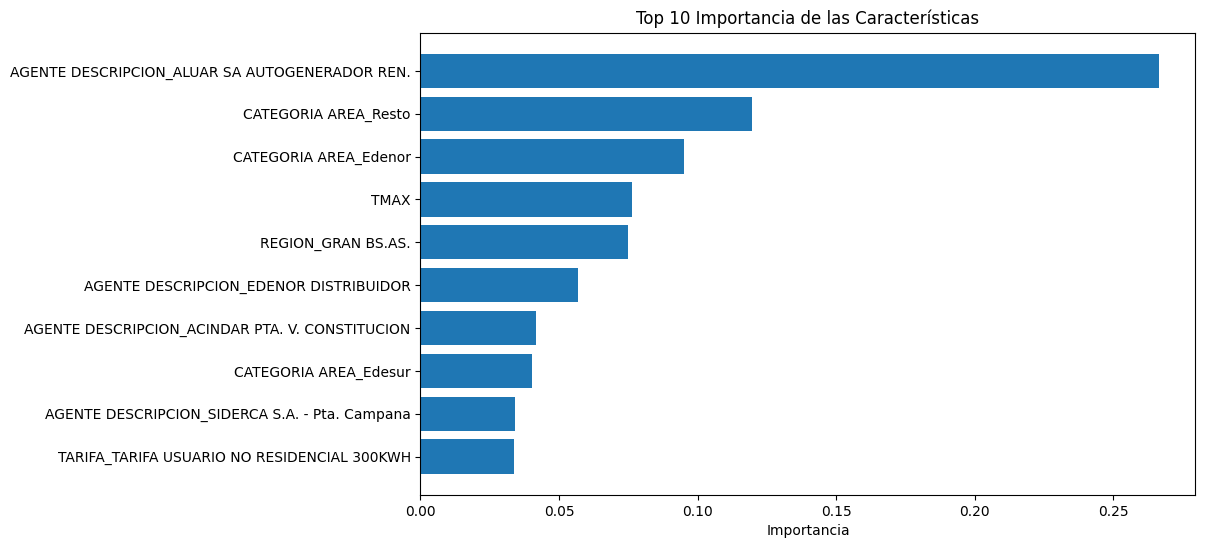

In [106]:
import matplotlib.pyplot as plt
import numpy as np

# Entrenar el modelo (asumiendo que ya tienes X_train y y_train preparados)
gb_model = GradientBoostingRegressor(
    learning_rate=0.2,
    max_depth=5,
    n_estimators=200,
    min_samples_split=10,
    min_samples_leaf=2,
    random_state=42
)
gb_model.fit(X_train, y_train)


# Obtener la importancia de las características
feature_importances = gb_model.feature_importances_

# Ordenar las características por importancia y obtener las 10 más importantes
indices = np.argsort(feature_importances)[-10:]  # Seleccionar los índices de las 10 características más importantes

# Preparar los nombres y las importancias de las 10 características más importantes
top_features = X_train.columns[indices]
top_importances = feature_importances[indices]

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.title("Top 10 Importancia de las Características")
plt.barh(range(len(top_importances)), top_importances, align='center')
plt.yticks(range(len(top_importances)), top_features)
plt.xlabel("Importancia")
plt.show()


AGENTE DESCRIPCION_ALUAR SA AUTOGENERADOR REN.: 0.266371, esta es la característica más importante del modelo. Significa que aproximadamente el 26.64% de la decisión predictiva del modelo se atribuye a esta variable, que identifica específicamente a este agente.

CATEGORIA AREA_Resto: 0.119645, esta característica representa alrededor del 11.96% de la importancia en la predicción del modelo. Indica que el área clasificada como "Resto" tiene un impacto significativo en la predicción de la demanda eléctrica.

CATEGORIA AREA_Edenor: 0.094995, esto muestra que el área de Edenor contribuye con aproximadamente el 9.50% a la capacidad predictiva del modelo.

TMAX: 0.076350, representa la temperatura máxima, con cerca del 7.64% de la importancia. Esto indica que las condiciones climáticas, en particular la temperatura máxima, afectan la demanda eléctrica.

REGION_GRAN BS.AS.: 0.075064, sugiere que la región del Gran Buenos Aires tiene una contribución del 7.51% en la predicción de la demanda.

AGENTE DESCRIPCION_EDENOR DISTRIBUIDOR: 0.056805, muestra la importancia del distribuidor Edenor en el modelo, con un 5.68% de influencia.

AGENTE DESCRIPCION_ACINDAR PTA. V. CONSTITUCION: 0.041781, representa la importancia de esta entidad con un 4.18% en el modelo.

CATEGORIA AREA_Edesur: 0.040086, indica que Edesur como área tiene una importancia del 4.01% en la predicción del modelo.

AGENTE DESCRIPCION_SIDERCA S.A. - Pta. Campana: 0.034110, contribuye con un 3.41% a la capacidad predictiva del modelo.

TARIFA_TARIFA USUARIO NO RESIDENCIAL <300KWH: 0.033909, sugiere que la tarifa para usuarios no residenciales con un consumo menor a 300 KWh tiene una contribución del 3.39% en la predicción.

Estos valores dan una perspectiva de qué tan importantes son estas características individuales para el modelo en la tarea de predecir la demanda eléctrica, indicando dónde se centra la mayoría de la influencia predictiva y así guiar la toma de decisiones.

Un análisis a tener en cuenta es su diversidad de factores; Es positivo ver que varias categorías diferentes y factores como la temperatura y la región también juegan un papel significativo, lo que sugiere que el modelo está considerando múltiples aspectos para hacer sus predicciones.

**La importancia de las características del modelo de XGBOOST**

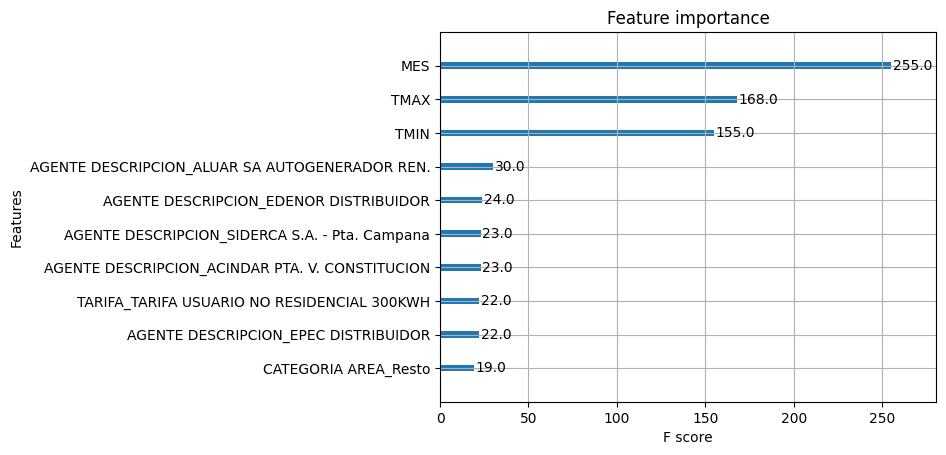

In [108]:
from xgboost import plot_importance
# Visualizar la importancia de las características
plot_importance(xgb_model, max_num_features=10)  # Muestra solo las 10 características más importantes
plt.show()

In [109]:


# Asumiendo que xgb_model es tu modelo XGBoost entrenado
# Obtener la importancia de las características
importances_xgb = xgb_model.feature_importances_

# Crear un DataFrame con los nombres de las características y su importancia
features_xgb = X_train.columns
importances_df_xgb = pd.DataFrame({
    'Feature': features_xgb,
    'Importance': importances_xgb
})

# Ordenar el DataFrame por la importancia de las características
top_importances_df_xgb = importances_df_xgb.sort_values(by='Importance', ascending=False)

# Mostrar las 10 características más importantes
top_10_importances_df_xgb = top_importances_df_xgb.head(10)
top_10_importances_df_xgb


,Feature,Importance
41,AGENTE DESCRIPCION_ALUAR SA AUTOGENERADOR REN.,0.222926
212,AGENTE DESCRIPCION_EDENOR DISTRIBUIDOR,0.167735
510,CATEGORIA AREA_Resto,0.136913
215,AGENTE DESCRIPCION_EDESUR DISTRIBUIDOR,0.113713
16,AGENTE DESCRIPCION_ACINDAR PTA. V. CONSTITUCION,0.046181
409,AGENTE DESCRIPCION_SIDERCA S.A. - Pta. Campana,0.037529
232,AGENTE DESCRIPCION_EPEC DISTRIBUIDOR,0.037337
515,TARIFA_TARIFA USUARIO NO RESIDENCIAL 300KWH,0.035134
117,AGENTE DESCRIPCION_CEOS CONCORDIA,0.025963
7,REGION_GRAN BS.AS.,0.019853


Las variables relevantes son parecidas en ambos modelos. Los resultados de este analisis fueron los siguientes:

AGENTE DESCRIPCION_ALUAR SA AUTOGENERADOR REN.: 0.222926 - Esta es la característica más importante, contribuyendo aproximadamente el 22.29% a las predicciones del modelo. Significa que la actividad o datos relacionados con ALUAR SA como autogenerador renovable tienen un gran impacto en las predicciones de demanda eléctrica.

AGENTE DESCRIPCION_EDENOR DISTRIBUIDOR: 0.167735 - Representa el 16.77% de la importancia, lo que indica que los datos de EDENOR como distribuidor juegan un papel significativo en el modelo.

CATEGORIA AREA_Resto: 0.136913 - Con un 13.69% de importancia, indica que la categoría de área "Resto" es un factor importante para determinar la demanda eléctrica en el modelo.

AGENTE DESCRIPCION_EDESUR DISTRIBUIDOR: 0.113713 - Tiene un 11.37% de importancia, lo que muestra la relevancia de EDESUR como distribuidor en las predicciones.

AGENTE DESCRIPCION_ACINDAR PTA. V. CONSTITUCION: 0.046181 - Contribuye con un 4.62%, lo que significa que la actividad en esta planta de ACINDAR tiene un impacto moderado en el modelo.

AGENTE DESCRIPCION_SIDERCA S.A. - Pta. Campana: 0.037529 - Indica que SIDERCA en su planta Campana tiene un 3.75% de importancia en la predicción.

AGENTE DESCRIPCION_EPEC DISTRIBUIDOR: 0.037337 - Casi igual en importancia a SIDERCA, con un 3.73%, reflejando el papel de EPEC como distribuidor.

TARIFA_TARIFA USUARIO NO RESIDENCIAL <300KWH: 0.035134 - Con un 3.51%, muestra la influencia de esta tarifa específica para usuarios no residenciales con consumo menor a 300 KWh en las predicciones.

AGENTE DESCRIPCION_CEOS CONCORDIA: 0.025963 - Aporta un 2.60%, indicando que la información de CEOS Concordia tiene cierta relevancia en el modelo.

REGION_GRAN BS.AS.: 0.019853 - Con un 1.99%, esta característica muestra que la región del Gran Buenos Aires tiene una importancia menor pero presente en las predicciones.

# **Conclucion**:
XGBoost tiene una precisión ligeramente mejor y ofrece una buena interpretabilidad de las características importantes, pero el Gradient Boosting es mucho más rápido de entrenar y ejecutar, la decisión puede depender de cuánto se valore el tiempo de ejecución frente a la mejora marginal en la precisión.
